<a href="https://colab.research.google.com/github/michelleabraham-git/Stats_minor/blob/main/Copy_of_CSSL_05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"michellexoxo","key":"dfa4cb7839e10a9f417502dee6b7408e"}'}

In [2]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [4]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
  0% 0.00/48.5k [00:00<?, ?B/s]
100% 48.5k/48.5k [00:00<00:00, 161MB/s]


In [5]:
!unzip student-performance-multiple-linear-regression.zip

Archive:  student-performance-multiple-linear-regression.zip
  inflating: Student_Performance.csv  


In [6]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [7]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Student_Performance.csv',
 'kaggle.json',
 'student-performance-multiple-linear-regression.zip',
 'sample_data']

The Student_Performance.csv is available!

In [20]:
data = pd.read_csv("Student_Performance.csv") # Read the csv file into a pandas dataframe
type(data) #best way to visualise this type of data is in tables
data.head() #give first 5
# here we have 5 features in total, the performance index is what we are trying to predict
length = len(data)
print(length) # there are 10000 rows
data.shape # gives the number of rows and columns

10000


(10000, 6)

In [21]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
data.info() # Gives basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [23]:
encoder = LabelEncoder() #makes the extracurricular activites (yes or no data) to binary data

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [24]:
X = data.drop(columns = "Performance Index")
y = data["Performance Index"] #dont want this cuz we are predicting this

In [25]:
X.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9104,4,82,1,8,8
5068,1,70,0,6,3
7763,9,52,0,4,0
5418,6,43,0,8,9
5939,2,41,0,6,5


In [27]:
data.iloc[2] #When you use data.iloc[2], it retrieves the row at index position 2 (which is the third row, as indexing starts from 0) from your DataFrame

,2
Hours Studied,8.0
Previous Scores,51.0
Extracurricular Activities,1.0
Sleep Hours,7.0
Sample Question Papers Practiced,2.0
Performance Index,45.0


In [28]:
data.iloc[2:5] # extracts third to fifth

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [26]:
y.sample(5)

,Performance Index
5673,43.0
9295,74.0
8936,82.0
1467,58.0
4213,44.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # taking 20% as test and the rest 80 as train dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [30]:
model = LinearRegression()
model.fit(X_train,y_train) #fitting the data with the training dataset

LinearRegression()

In [31]:
model.score(X_train, y_train) #it returns the R^2; if r^2 is 1 every predcited value matches the actual

0.9886898790682355

In [32]:
predict = np.round(model.predict(X_test), decimals = 1)

In [33]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


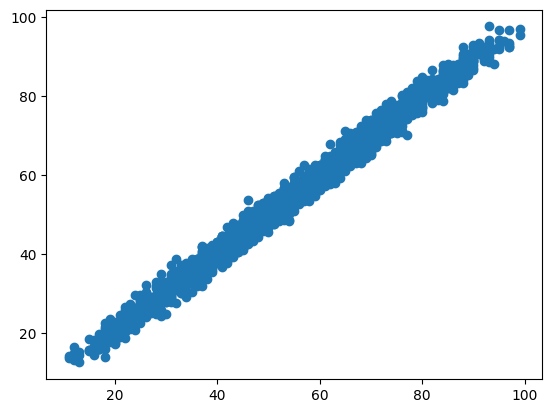

In [34]:
plt.scatter(y_test, predict) #if it perfect matches the actual it'll be a 45 degree line, this one is close its doing a pretty good job
plt.show()

In [35]:
r2_score(y_test,predict) #plotting r^2 of the test dataset

0.9889704960519785

In [36]:
model.coef_, model.intercept_

(array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144]),
 np.float64(-33.92194621555638))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
predict = np.round(model.predict(X_test), decimals = 1)

In [ ]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

In [ ]:
plt.scatter(y_test, predict)
plt.show()

In [ ]:
r2_score(y_test,predict)

In [ ]:
model.coef_, model.intercept_

## Try performing simple linear regression on each of these features indvidually

In [ ]:
X_single_feature = data.drop(columns=["Sleep Hours", "Previous Scores", "Extracurricular Activities",	"Hours Studied", "Performance Index"])
y = data["Performance Index"]
X_single_feature

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
predict = np.round(model.predict(X_test), decimals = 1)

In [ ]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

In [ ]:
plt.scatter(y_test, predict)
plt.show()

In [ ]:
r2_score(y_test,predict)

In [ ]:
model.coef_, model.intercept_

In [ ]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

Let's try adding some correlation between Hours Studied and Question Papers Practiced

In [ ]:
X

In [ ]:
X["Hours Studied Correlated"] = round(X["Hours Studied"] - 0.1*X["Previous Scores"] + 0.1 * np.random.randn(len(X)))
X["Hours Studied Correlated"] = X["Hours Studied Correlated"].clip(lower=0)
X = X.drop(columns=["Hours Studied"])
X

Y` = wX + b
Y` - y hat
X - weight
b - bias
test scores = β^(study hours) + β0^

test score = β0 +β1X1 + β2X2 + β3X3 -- (this is linear, but 4D plot)

test score = β0 + β1X1 + β2X2
y = ax1 + bx2 + cx3 (3D geogebra)
in such a 3d or hyper dimension model, instead of dropping the points to the linear line, in such models we drop it to the plane, the goal is to find the plane that minimises these errors. - the best fit plane

lets take,
Y` = wX + b
w is β1
b is β0

yi^ = β0^ + β1^x1 + β2x2
instead of wrting every value we write is as a 1X2 matrix of weights and features that we input
FEATURES
[1 x11 x21
 1 x12 x22
 1 x13 x23
 1 x14
 .
 .
 . x1n x2n] (nX2)

WEIGHTS
[β0
 β1
 β2]

--------------
Test vs training data set
RSS (Mean squared error) = sigma(y-yi^)^2







